In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
dataset = sklearn.datasets.load_breast_cancer()

In [4]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
df = pd.DataFrame(dataset.data , columns = dataset.feature_names)

In [6]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
df['label'] = dataset.target

In [9]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [12]:
df['label'][:30]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: label, dtype: int32

In [13]:
df.shape

(569, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [19]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Separating Independent and Dependent Features

In [20]:
x= df.drop(columns = 'label',axis=1)
y = df['label']

In [21]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [22]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

## Train Test Split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

## Building the Neural Network

In [25]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [32]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (30,)),  #I/P layer
        keras.layers.Dense(20, activation = 'relu'), #1st hidden layer
        keras.layers.Dense(2, activation ='sigmoid') #O/P layer
])

C:\Users\mhtsa\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer='adam',
               loss= 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

## Training the Neural Network

In [34]:
history = model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7848 - loss: 0.5360 - val_accuracy: 0.9348 - val_loss: 0.4079
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.4208 - val_accuracy: 0.9348 - val_loss: 0.3410
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9050 - loss: 0.3411 - val_accuracy: 0.9348 - val_loss: 0.2919
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9136 - loss: 0.2816 - val_accuracy: 0.9348 - val_loss: 0.2541
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 0.2377 - val_accuracy: 0.9565 - val_loss: 0.2243
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9221 - loss: 0.2054 - val_accuracy: 0.9348 - val_loss: 0.2003
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9221 - loss: 0.1810 - val_accuracy: 0.9565 - val_loss: 0.1811
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9325 - loss: 0.1621 - val_accuracy: 0.9565 - val_loss

## Visualizing accuracy and loss

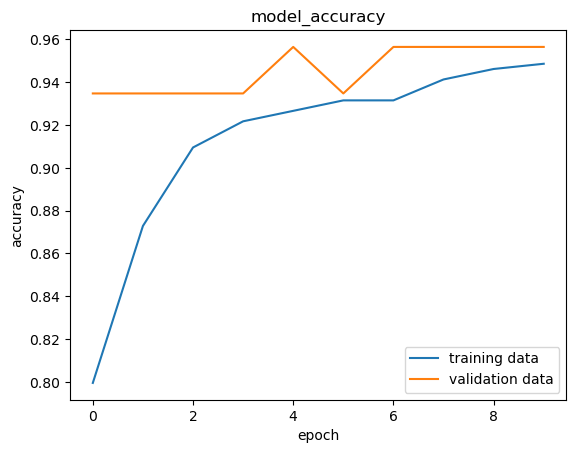

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'], loc = 'lower right')

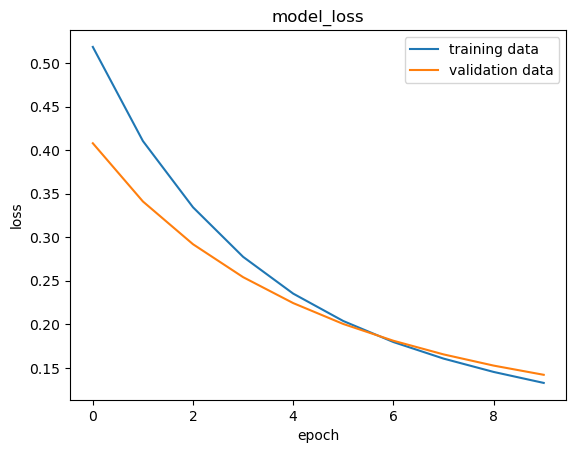

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data','validation data'], loc = 'upper right')

In [37]:
loss , accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.1368 
0.9649122953414917


In [38]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [39]:
y_pred = model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [40]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.40595278 0.5574381 ]


In [41]:
print(x_test_std)

[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


In [42]:
print(y_pred)

[[0.40595278 0.5574381 ]
 [0.4564488  0.6110481 ]
 [0.03919673 0.8597019 ]
 [0.9999588  0.08004309]
 [0.37022713 0.55967474]
 [0.998661   0.46770492]
 [0.24216114 0.8022142 ]
 [0.03149974 0.8588208 ]
 [0.11256858 0.77945226]
 [0.05480517 0.7499253 ]
 [0.32997096 0.6254507 ]
 [0.14237185 0.55494124]
 [0.2848919  0.72680247]
 [0.2540879  0.63156575]
 [0.06465206 0.8788723 ]
 [0.92555726 0.16565941]
 [0.05671188 0.80834806]
 [0.10835948 0.7637283 ]
 [0.09017728 0.8108725 ]
 [0.99004894 0.5208443 ]
 [0.02197265 0.7298152 ]
 [0.07038795 0.8467885 ]
 [0.07483777 0.8359936 ]
 [0.03778588 0.78110737]
 [0.14040773 0.6977943 ]
 [0.9591691  0.30992872]
 [0.16680703 0.7043583 ]
 [0.3416997  0.6338677 ]
 [0.9362295  0.36396798]
 [0.9549193  0.32683685]
 [0.06292801 0.6566429 ]
 [0.11093169 0.7926753 ]
 [0.06824268 0.74033684]
 [0.99977595 0.65572345]
 [0.99495226 0.43635795]
 [0.17345898 0.7387997 ]
 [0.02889554 0.9317846 ]
 [0.21957903 0.7830397 ]
 [0.05654481 0.82022554]
 [0.1812955  0.7377392 ]


In [43]:
# Convertng the prediction probabilities to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


## Building the Predictive System

In [ ]:
input_data = ()

# Change the input_data to numpy array
input_data_as_nparray = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point 
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
    print('The tumor is Malignant')
else:
    print('The tumor is Beign')